In [1]:
import os
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
def load(f, label):
    # load the file into tensor
    image = tf.io.read_file(f)
    # Decode it to JPEG format
    image = tf.image.decode_jpeg(image)
    # Convert it to tf.float32
    image = tf.cast(image, tf.float32)
    
    return image, label

In [3]:
image_path = 'dog.jpg.jpeg'
image, label = load(image_path, 0)


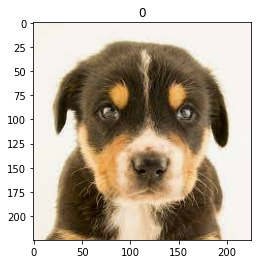

In [26]:
image, label = load('dog.jpg.jpeg', 0)

fig, ax = plt.subplots()
ax.imshow(image /260.)
ax.set_title(label)
plt.show()

In [5]:
def resize(input_image, size):
    return tf.image.resize(input_image, size)

In [6]:
def random_crop(input_image):
    return tf.image.random_crop(input_image, size=[100, 100, 3])

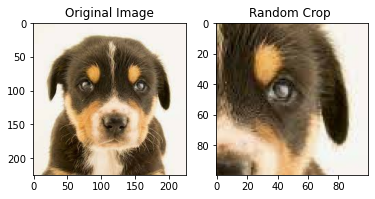

In [27]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image / 260.)
ax[0].set_title("Original Image")

ax[1].imshow(random_crop(image) / 260.)
ax[1].set_title("Random Crop ")
plt.show()

In [15]:
def central_crop(input_image):
    image = resize(input_image, [176, 176])
    return tf.image.central_crop(image, central_fraction=0.84)

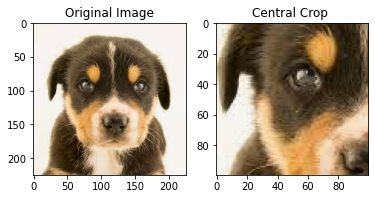

In [28]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image / 260.)
ax[0].set_title("Original Image")

ax[1].imshow(random_crop(image) / 260.)
ax[1].set_title("Central Crop ")
plt.show()

In [17]:
def random_rotation(input_image):
    angles = np.random.randint(0, 3, 1)
    return tf.image.rot90(input_image, k=angles[0])

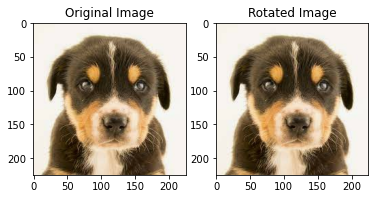

In [29]:
import numpy as np

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image / 260.)
ax[0].set_title("Original Image")

ax[1].imshow(random_rotation(image) / 260.)
ax[1].set_title("Rotated Image")
plt.show()

In [20]:
def random_jitter(input_image):
    # Resize it to 176 x 176 x 3
    image = resize(input_image, [176, 176])
    # Randomly Crop to 150 x 150 x 3
    image = random_crop(image)
    # Randomly rotation
    image = random_rotation(image)
    # Randomly mirroring
    image = tf.image.random_flip_left_right(image)
    return image

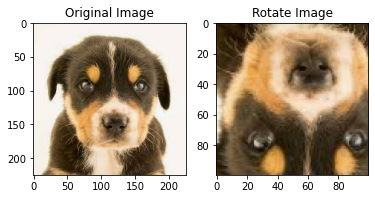

In [30]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image / 260.)
ax[0].set_title("Original Image")

ax[1].imshow(random_jitter(image) / 260.)
ax[1].set_title("Rotate Image")
plt.show()